In [1]:
!pip install --user --upgrade scikit-learn imbalanced-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, precision_recall_curve, auc
)
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time

In [3]:
# Set random seed for reproducibility
np.random.seed(42)


In [4]:
# Load the dataset
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found.")
    print("Please download the dataset and place it in the same directory as the notebook.")
    # Exit or handle appropriately if running as a script
    # exit() # Uncomment if running as .py script and want to stop


Dataset loaded successfully.
Dataset shape: (284807, 31)


In [5]:
# Display basic information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [6]:
# Display first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [7]:
# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().max()) # Quick check if any column has missing values



Missing Values:
0


In [9]:
# Check class distribution
print("\nClass Distribution:")
class_counts = df['Class'].value_counts()
print(class_counts)


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


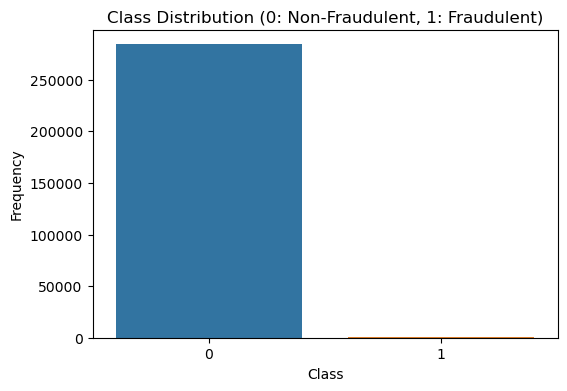


Percentage of Fraudulent Transactions: 0.1727%
Highly imbalanced dataset.


In [10]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print(f"\nPercentage of Fraudulent Transactions: {class_counts[1] / df.shape[0] * 100:.4f}%")
print("Highly imbalanced dataset.")


In [11]:
# %%
# Scale 'Time' and 'Amount' features
scaler = StandardScaler()

# Create copies of columns to scale to avoid SettingWithCopyWarning
df['scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)


In [12]:
# Move 'Class' column to the end (optional, for clarity)
if 'Class' in df.columns:
    class_col = df.pop('Class')
    df['Class'] = class_col

print("\nDataset after scaling 'Time' and 'Amount':")
print(df.head())



Dataset after scaling 'Time' and 'Amount':
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27   

In [13]:
# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")



Features shape: (284807, 30)
Target shape: (284807,)


In [14]:
# Split the data into training and testing sets (70% train, 30% test)
# Use stratify=y to ensure the proportion of classes is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nData Splitting:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nClass distribution in original data:")
print(y.value_counts(normalize=True))
print("\nClass distribution in training data:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test data:")
print(y_test.value_counts(normalize=True))



Data Splitting:
X_train shape: (199364, 30)
X_test shape: (85443, 30)
y_train shape: (199364,)
y_test shape: (85443,)

Class distribution in original data:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Class distribution in training data:
Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64

Class distribution in test data:
Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64


In [15]:
!pip install imbalanced-learn


In [16]:
# Apply SMOTE to the training data only
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nShapes after SMOTE:")
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")

print("\nClass distribution in resampled training data:")
print(pd.Series(y_train_resampled).value_counts())



Applying SMOTE to the training data...

Shapes after SMOTE:
X_train_resampled shape: (398040, 30)
y_train_resampled shape: (398040,)

Class distribution in resampled training data:
Class
0    199020
1    199020
Name: count, dtype: int64


In [17]:
# --- Model 1: Logistic Regression ---
print("\n--- Training Logistic Regression ---")
start_time = time.time()

log_reg = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
log_reg.fit(X_train_resampled, y_train_resampled)

end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")




--- Training Logistic Regression ---
Training completed in 2.09 seconds.


In [18]:
# --- Model 2: Random Forest ---
print("\n--- Training Random Forest ---")
start_time = time.time()

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # Use n_jobs=-1 to use all processors
rf_clf.fit(X_train_resampled, y_train_resampled)

end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")



--- Training Random Forest ---
Training completed in 69.21 seconds.


In [25]:
# Function to evaluate models and plot confusion matrix and PR curve
def evaluate_model(model, X_test, y_test, model_name="Model"):
    print(f"\n--- Evaluating {model_name} ---")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Non-Fraud (0)', 'Fraud (1)'])
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

    print("\nConfusion Matrix:")
    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


    print("\nClassification Report:")
    print(class_report)


In [39]:
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # For AUC/PR AUC calculation

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Precision-Recall AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    
    # Classification Report for Fraud Recall & Precision
    report_dict = classification_report(y_test, y_pred, target_names=['Non-Fraud (0)', 'Fraud (1)'], output_dict=True)
    fraud_recall = report_dict['Fraud (1)']['recall']
    fraud_precision = report_dict['Fraud (1)']['precision']

    # Return key metrics
    return accuracy, roc_auc, pr_auc, fraud_recall, fraud_precision


In [40]:
def evaluate_model(model, X_test, y_test, model_name):
    # ... code for prediction and metrics
    print(f"Returning metrics for {model_name}")
    return accuracy, roc_auc, pr_auc, fraud_recall, fraud_precision



--- Evaluating Logistic Regression ---
Accuracy: 0.9773
ROC AUC Score: 0.9660
Precision-Recall AUC Score: 0.7428

Confusion Matrix:


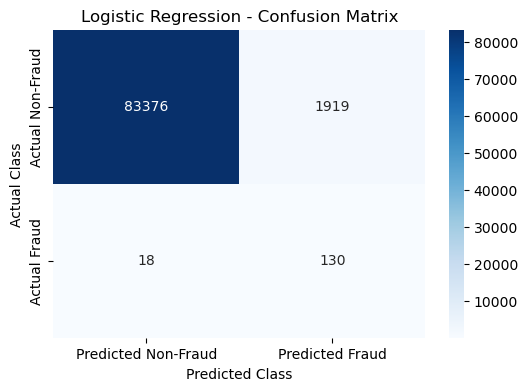


Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     85295
    Fraud (1)       0.06      0.88      0.12       148

     accuracy                           0.98     85443
    macro avg       0.53      0.93      0.55     85443
 weighted avg       1.00      0.98      0.99     85443



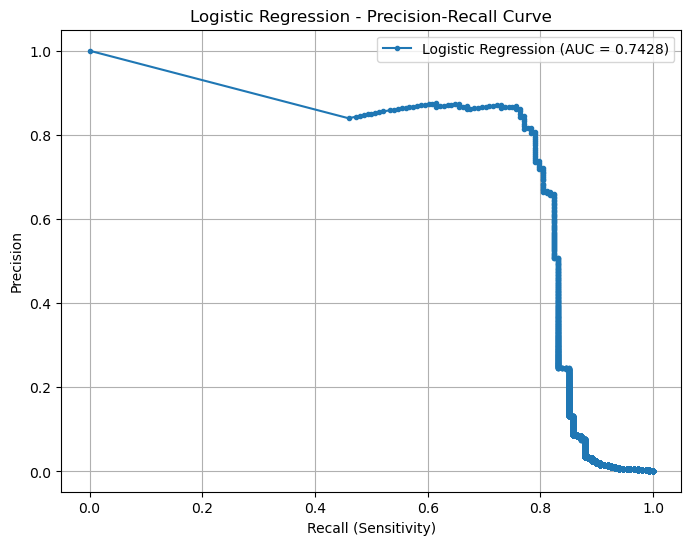


--- Evaluating Random Forest ---
Accuracy: 0.9994
ROC AUC Score: 0.9489
Precision-Recall AUC Score: 0.8302

Confusion Matrix:


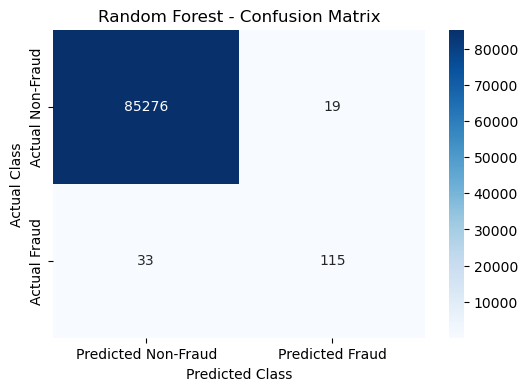


Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     85295
    Fraud (1)       0.86      0.78      0.82       148

     accuracy                           1.00     85443
    macro avg       0.93      0.89      0.91     85443
 weighted avg       1.00      1.00      1.00     85443



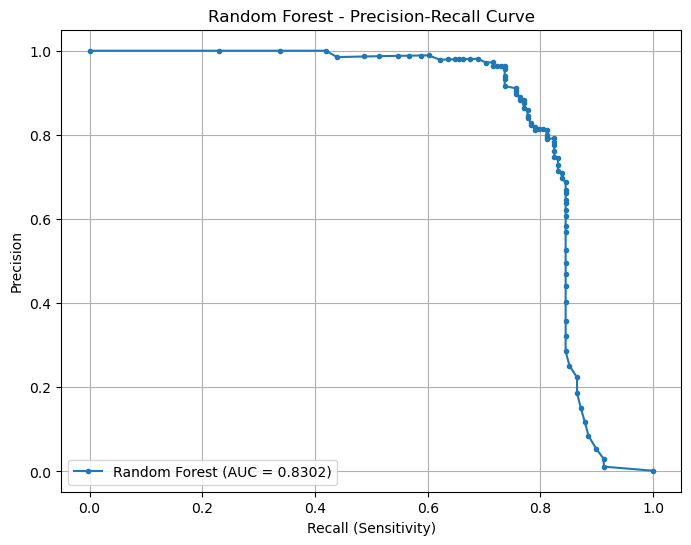


--- Model Comparison ---
                 Model  Accuracy   ROC AUC    PR AUC  Fraud Recall  \
0  Logistic Regression  0.977330  0.965989  0.742791      0.878378   
1        Random Forest  0.999391  0.948886  0.830181      0.777027   

   Fraud Precision  
0         0.063446  
1         0.858209  


In [41]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    print(f"\n--- Evaluating {model_name} ---")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Non-Fraud (0)', 'Fraud (1)'])
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

    print("\nConfusion Matrix:")
    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


    print("\nClassification Report:")
    print(class_report)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AUC = {pr_auc:.4f})')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.xlabel('Recall (Sensitivity)')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return key metrics for comparison
    # Focus on Recall for Fraud (class 1) and Precision for Fraud (class 1)
    report_dict = classification_report(y_test, y_pred, target_names=['Non-Fraud (0)', 'Fraud (1)'], output_dict=True)
    fraud_recall = report_dict['Fraud (1)']['recall']
    fraud_precision = report_dict['Fraud (1)']['precision']

    return accuracy, roc_auc, pr_auc, fraud_recall, fraud_precision

# %%
# Evaluate Logistic Regression
lr_accuracy, lr_roc_auc, lr_pr_auc, lr_fraud_recall, lr_fraud_precision = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

# %%
# Evaluate Random Forest
rf_accuracy, rf_roc_auc, rf_pr_auc, rf_fraud_recall, rf_fraud_precision = evaluate_model(rf_clf, X_test, y_test, "Random Forest")

# %% [markdown]
# ## 7. Results Summary & Discussion
#
# Compare the performance of the models based on the evaluation metrics.

# %%
print("\n--- Model Comparison ---")
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'ROC AUC': [lr_roc_auc, rf_roc_auc],
    'PR AUC': [lr_pr_auc, rf_pr_auc],
    'Fraud Recall': [lr_fraud_recall, rf_fraud_recall],
    'Fraud Precision': [lr_fraud_precision, rf_fraud_precision]
})

print(results)